Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **1 hour and 30 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Liuda Serohina"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Mergesort and recurrences

## Question 1 [time estimate: 20 minutes]

First, please read carefully [this note](https://drive.google.com/open?id=1SfrRTKWDb6szsJENgvNF7-u2B96ecaF2), which reviews the MERGE operation in Cormen et al.

After reviewing the example above (Cormen et al., Figure 2.3),  you need to manually create similar illustrations as in the example above but this time for the input array:

![array](array.png)

For this exercise, assume that the call to the algorithm is MERGE(A, 1, 3, 6) and draw different resulting stages of the arrays A, L, and R as the merge algorithm is executed.  You can hand-draw or use any drawing tool to produce panel illustrations, as in the example above.  Include your final drawings in the cell below. Feel free to use additional cells (Markdown or Code) for this question.

**Note**: ```MERGE``` function is to combine two lists together, not to create a sorted list. Please check the parameters carefully to correctly identify two sub-lists you need to merge.

Since the last index is 6, I sorted the array only till this index, leaving values 6 and 9 under indeces 7 and 8 unsorted.
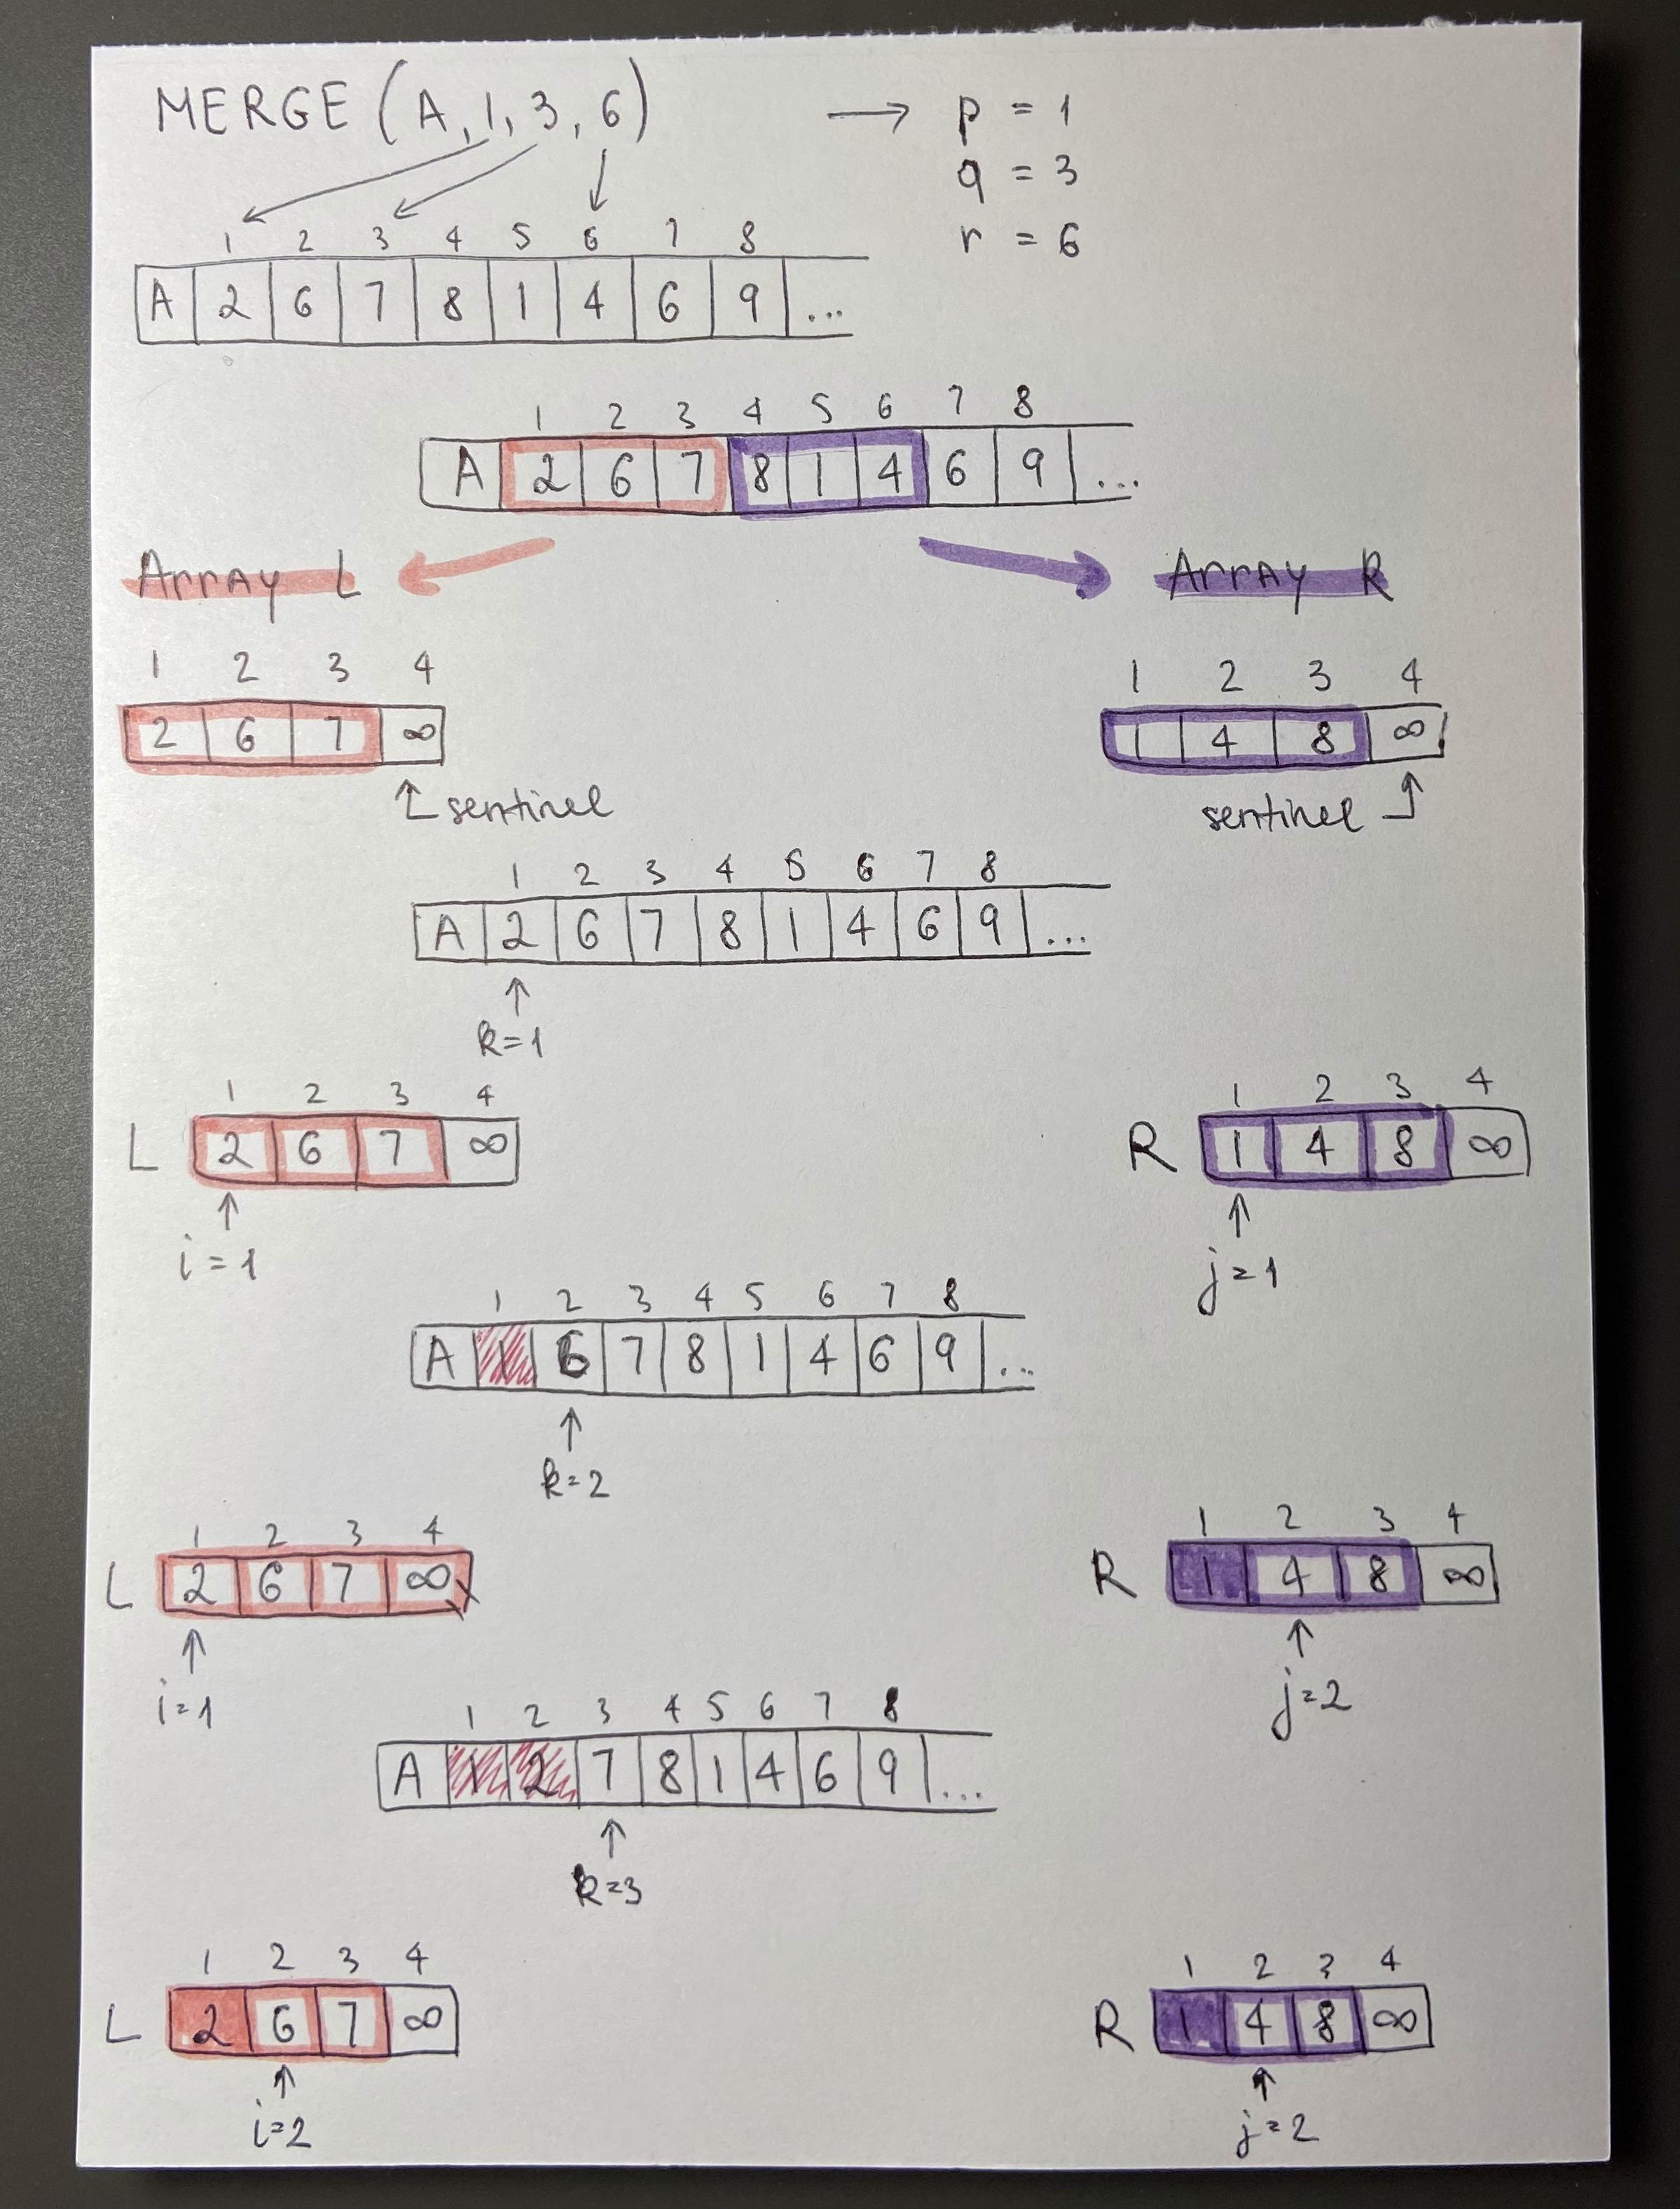
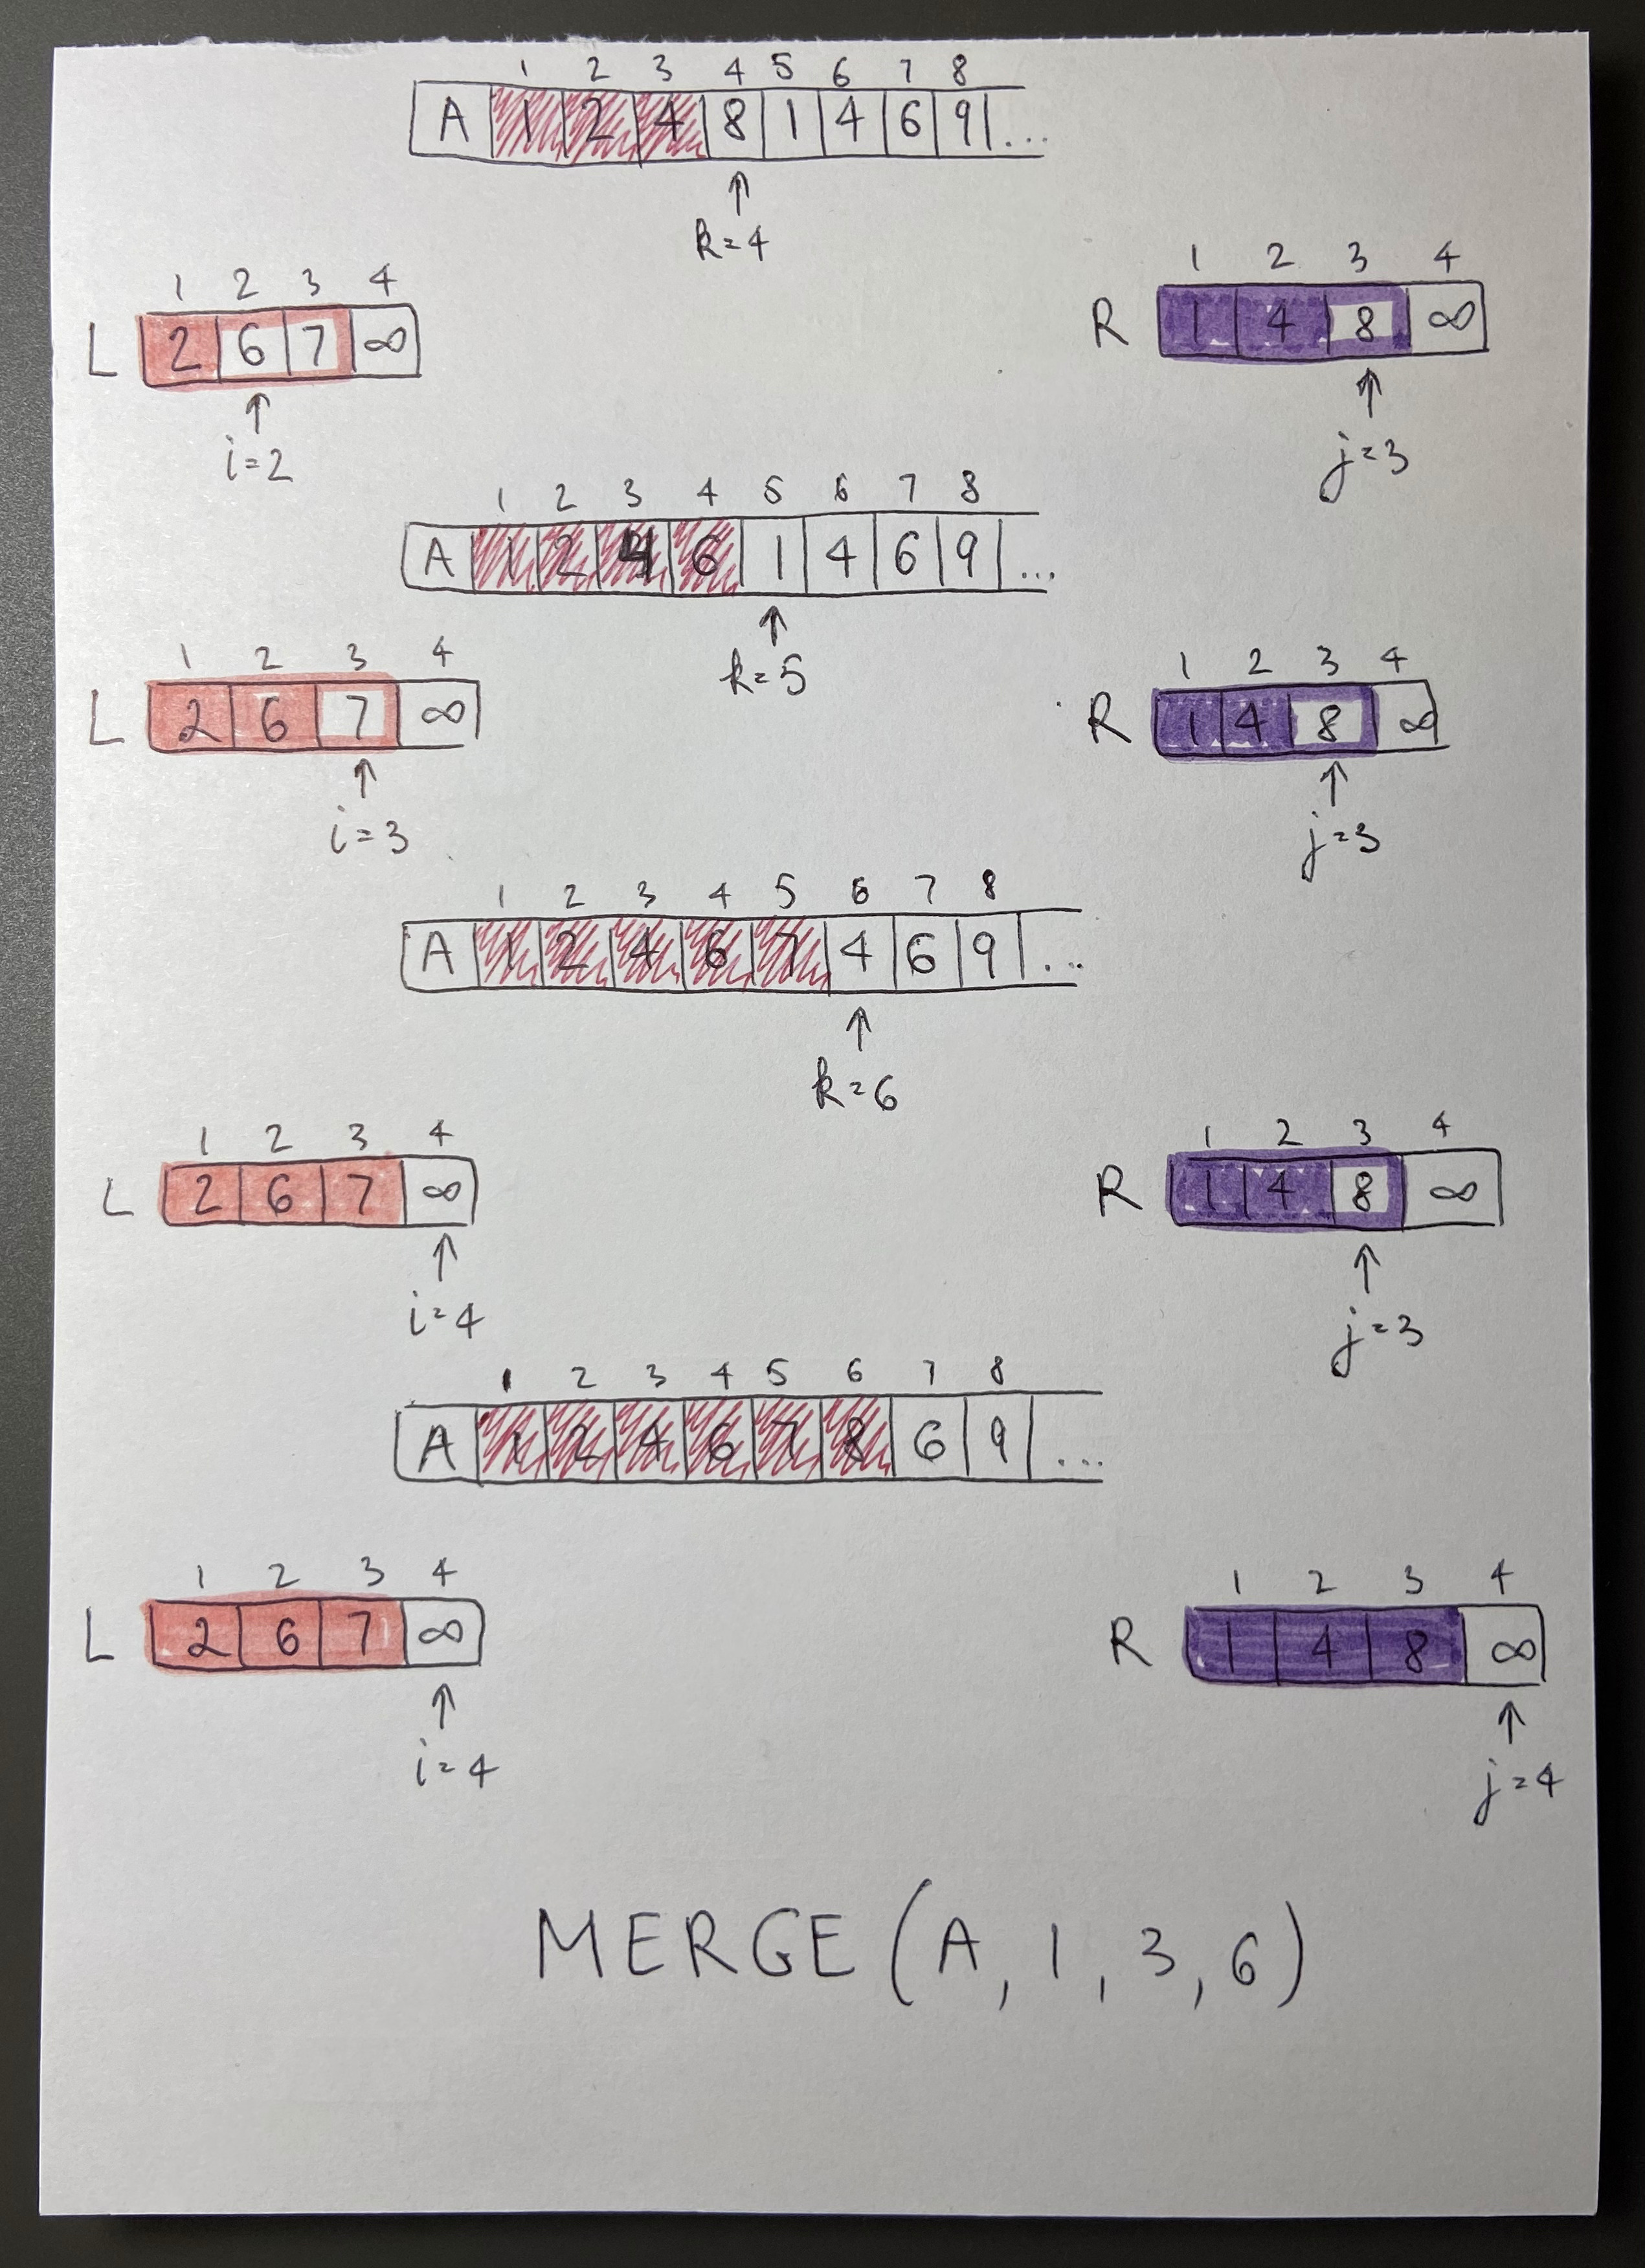

## Question 2 [time estimate: 5 minutes]
Now using your understanding of Part I of the merge algorithm, can you think of an efficient way to implement this part in Python? (hint: using Python lists). Give your answer in prose in the cell below.

You would need a couple of functions that call on each other to arrive at the sorted array. One of the functions would take the list with the 1st and last index, find the middle point by dividing the length by 2 to create 2 sublists. Then the function calls on another function that sorts the lists and the 2 sorted lists are combined together. 

## Question 3 [time estimate: 20 minutes]

Write a Python implementation of the merge pseudocode (both parts). Your Python function must take the same four input arguments as described in the $MERGE(A,p,q,r)$. Test your code by running the example in problem 1 and 2 of this pre-class work. Feel free to come up with additional cases to check if your code is working properly. Your code should return A.

**Note**: Please note that the pseudocde in Cormen et. al. works with the indexing convention starting at 1; in Python we will use the customary indexing convention starting at 0.

In [32]:
def merge(A, p, q, r):
    '''This function creates sub-arrays for temporary storage and
    performs sorting on the left and write sub-arrays'''
    n1 = q - p + 1 #compute length of sub-array n1
    n2 = r - q ##compute length of sub-array n2
    
    L = [0] * (n1) #create array L for temporary storage
    L.append(99999) #add a sentinel
    R = [0] * (n2) #create array R for temporary storage
    R.append(99999) #add a sentinel
    
    for i in range(0, n1): #copy the subarray to put it in L
        L[i] = A[p+i]
    for j in range(0, n2): #copy the subarray to put it in R
        R[j]=A[q+j+1]
        
    i = j = k = 0 #assign starting values
    for k in range(p, r+1): #iterate over the whole length of the array
            if L[i] <= R[j]: #if 1st value in R > 1st value in L
                A[k] = L[i] #put 1st value from L as the 1st value in array A
                i += 1 #move to the next index
            else:
                A[k] = R[j] #if 1st value in R < 1st value in L, assign it as the 1st value in array
                j += 1 #move to the next index
            k += 1 #move to the next index

def merge2(A, p, r):
    '''This function takes the input array, breaks it down into 2 parts 
    and then passes these parts to the merge function, which performs sorting'''
    if p < r: #if the length is greater than 1
        q = p + r // 2 #find the middle index
        merge2(A, p, q) #create sub-array 1
        merge2(A, q+1, r) #create sub-array 2
        merge(A, p, q, r) #call merge function to sort
    return(A)

In [33]:
#testing
A = [33, 2, 6, 8, 93, 0] 
merge2(A, 0, len(A)-1)

RecursionError: maximum recursion depth exceeded in comparison

In [30]:
#The function does not work and I get the following error: 
#"RecursionError: maximum recursion depth exceeded in comparison"
#There is probably something that I've missed which doesn't allow for the recursion to happen, 
#but I can't find where the issue is.

In [31]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 4 [time estimate: 5 minutes]

Suppose that your Python implementation of the merge algorithm is already working. Read and comment the code for merge sort below:

In [1]:
def merge_sort(A,p,r):
    if p < r: #if this condition holds (if the length is greater than 1)
        q = (p+r)//2 #find the middle index
        merge_sort(A,p,q) #create sub-array 1
        merge_sort(A,q+1,r) #create sub-array 2
        merge(A,p,q,r) #call merge function to sort
    return(A)

In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 5 [time estimate: 15 minutes]
Count the number of steps and time your merge_sort() function with the following input: `list_k = [i for i in range(100*k, 0, -1)] `, where $k= 1, 2, 3, …, 15 $. If you are not familiar with what this piece of code is doing, you may want to check the "List Comprehension" section in this [Python Help Sheet](https://drive.google.com/open?id=1paW2ByiraoDQViie0gGxApRN9DKbjHGx).


In [37]:
import time #import time to calculate running time
start_time = time.time() #start timing

def merge(A, p, q, r):
    '''This function creates sub-arrays for temporary storage and
    performs sorting on the left and write sub-arrays'''
    counter = 0
    
    n1 = q - p + 1 #compute length of sub-array n1
    n2 = r - q ##compute length of sub-array n2
    
    L = [0] * (n1) #create array L for temporary storage
    L.append(99999) #add a sentinel
    R = [0] * (n2) #create array R for temporary storage
    R.append(99999) #add a sentinel
    
    for i in range(0, n1): #copy the subarray to put it in L
        L[i] = A[p+i]
    for j in range(0, n2): #copy the subarray to put it in R
        R[j]=A[q+j+1]
        
    i = j = k = 0 #assign starting values
    for k in range(p, r+1): #iterate over the whole length of the array
            if L[i] <= R[j]: #if 1st value in R > 1st value in L
                A[k] = L[i] #put 1st value from L as the 1st value in array A
                i += 1 #move to the next index
            else:
                A[k] = R[j] #if 1st value in R < 1st value in L, assign it as the 1st value in array
                j += 1 #move to the next index
            k += 1 #move to the next index
            counter += 1
    return counter

def merge2(A, p, r):
    '''This function takes the input array, breaks it down into 2 parts 
    and then passes these parts to the merge function, which performs sorting'''
    if p < r: #if the length is greater than 1
        q = p + r // 2 #find the middle index
        merge2(A, p, q) #create sub-array 1
        merge2(A, q+1, r) #create sub-array 2
        merge(A, p, q, r) #call merge function to sort
    return A

list_k = [i for i in range(100*(1:16), 0, -1)]
merge2(list_k, 0, len(list_K)-1)

print("--- %s seconds ---" % (time.time() - start_time)) #get running time

SyntaxError: invalid syntax (<ipython-input-37-31a86c59ebba>, line 44)

In [ ]:
#Nothing really works :(
#I don't necessarily understand how to interpret the contents 
#of the list_k and this complicates things. I've checked the doc, but still didn't get it.
#Specifically, how do I specify "k" in this case?

## Question 6 [time estimate: 25 minutes] 
Use the code you wrote for Lesson "Measuring algorithms' efficiency" (i.e., selection sort, bubble sort, insertion sort). Plot the following graphs:
* **Graph 1**: 4 lines for **the number of steps** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why? 
* **Graph 2**: 4 lines for **the timing** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why?

Use as many cells as you wish (code cells or markdown cells alike) to complete this question.

You may find the section "Simple 2-Dimensional Plots in Python" in this [Python Help Sheet](https://drive.google.com/open?id=1paW2ByiraoDQViie0gGxApRN9DKbjHGx) helpful.

In [39]:
import time #import time to calculate running time
start_time = time.time() #start timing

def insertion_sort(A):
    counter = 0
    for j in range(1, len(A)):
        key = A[j] #assign to go thru each item in a sequence
        i= j-1 #value for comparison is the one to the left of j
        while i >= 0 and A[i]>key: #i>=0 bc Python allows negative indexing, which might lead to taking values from the end of the sequence and comparing them
            A[i+1] = A[i]
            i -= 1 #incrementally step down the list
        A[i+1] = key
        counter += 1 #add step
    return counter

A = [9,29,0,14,58]
print(insertion_sort(A))

print("--- %s seconds ---" % (time.time() - start_time)) #get running time

4
--- 0.00041413307189941406 seconds ---


In [42]:
start_time = time.time() #start timing

def bubble_sort(A):
    counter = 0
    n=len(A)
    for i in range(n-1):  #go through all the elements in an array
        for j in range(0, n-i-1): #go through the array from 0 to n-i-1
            if A[j] > A[j+1]: #if the element you found is greater then the following one, swap them
                A[j], A[j+1] = A[j+1], A[j]
            counter += 1 #add step
    return counter

A = [9,29,0,14,58]
print(bubble_sort(A))

print("--- %s seconds ---" % (time.time() - start_time)) #get running time

10
--- 0.0015139579772949219 seconds ---


In [41]:
start_time = time.time() #start timing

def selection_sort(A):
    counter = 0
    n=len(A)
    for i in range(n): #go through all the elements in the array
        min_ind = i #search for the minimum value in the unsorted partition
        for j in range(i+1, n): #all the elements to the right of i
            #update the minimum number if the condition holds true
            if A[j] < A[min_ind]:
                min_ind = j
        #swap the new minimum number with the first element
        A[i], A[min_ind] = A[min_ind], A[i]
        counter += 1 #add step
    return counter

A = [9,29,0,14,58]
print(selection_sort(A))

print("--- %s seconds ---" % (time.time() - start_time)) #get running time

5
--- 0.0004620552062988281 seconds ---


In [44]:
start_time = time.time() #start timing

def merge(A, p, q, r):
    '''This function creates sub-arrays for temporary storage and
    performs sorting on the left and write sub-arrays'''
    counter = 0
    
    n1 = q - p + 1 #compute length of sub-array n1
    n2 = r - q ##compute length of sub-array n2
    
    L = [0] * (n1) #create array L for temporary storage
    L.append(99999) #add a sentinel
    R = [0] * (n2) #create array R for temporary storage
    R.append(99999) #add a sentinel
    
    for i in range(0, n1): #copy the subarray to put it in L
        L[i] = A[p+i]
    for j in range(0, n2): #copy the subarray to put it in R
        R[j]=A[q+j+1]
        
    i = j = k = 0 #assign starting values
    for k in range(p, r+1): #iterate over the whole length of the array
            if L[i] <= R[j]: #if 1st value in R > 1st value in L
                A[k] = L[i] #put 1st value from L as the 1st value in array A
                i += 1 #move to the next index
            else:
                A[k] = R[j] #if 1st value in R < 1st value in L, assign it as the 1st value in array
                j += 1 #move to the next index
            k += 1 #move to the next index
            counter += 1
    return counter

def merge2(A, p, r):
    '''This function takes the input array, breaks it down into 2 parts 
    and then passes these parts to the merge function, which performs sorting'''
    if p < r: #if the length is greater than 1
        q = p + r // 2 #find the middle index
        merge2(A, p, q) #create sub-array 1
        merge2(A, q+1, r) #create sub-array 2
        merge(A, p, q, r) #call merge function to sort
    return A

A = [9,29,0,14,58]
print(merge2(A, 0, len(A)-1))

print("--- %s seconds ---" % (time.time() - start_time)) #get running time

RecursionError: maximum recursion depth exceeded in comparison

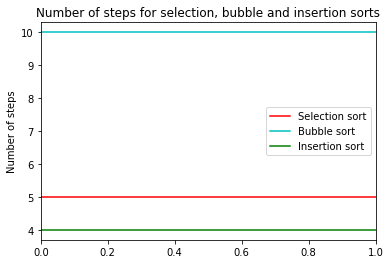

In [55]:
import matplotlib.pyplot as plt #import for plotting
%matplotlib inline #so that it plots in the notebook
x = [i for i in range (10)] #setting the ranges for the plot
y = [i for i in range (12)]

plt.title("Number of steps for selection, bubble and insertion sorts") #setting a title
plt.ylabel("Number of steps") #setting the y-label
plt.axhline(y=5, color='r', linestyle='-', label='Selection sort') #plotting a line for selection sort
plt.axhline(y=10, color='c', linestyle='-', label='Bubble sort') #plotting a line for bubble sort
plt.axhline(y=4, color='g', linestyle='-', label='Insertion sort') #plotting a line for insertion sort

plt.legend() 
plt.show()

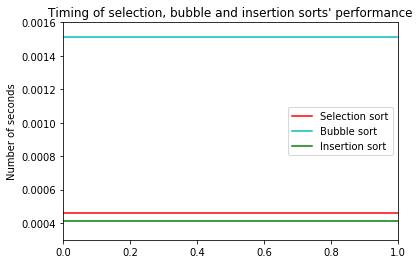

In [72]:
plt.ylim(0.0003, 0.0016)
plt.title("Timing of selection, bubble and insertion sorts' performance") #setting a title
plt.ylabel("Number of seconds") #setting the y-label
plt.axhline(y=0.0004620552062988281, color='r', linestyle='-', label='Selection sort') #plotting a line for selection sort
plt.axhline(y=0.0015139579772949219, color='c', linestyle='-', label='Bubble sort') #plotting a line for bubble sort
plt.axhline(y=0.00041413307189941406, color='g', linestyle='-', label='Insertion sort') #plotting a line for insertion sort

plt.legend()
plt.show()

In [73]:
#There is nothing on merge sort in the plots because it didn't work :(

In [ ]:
#I would expect the merge sort to have the have the smallest timing out of all algorithms 
#since its time complexity is O(n*log n). I think merge sort would have had a significantly large number of steps
#because of the multiple divisions it performs. 